In [ ]:
import xarray as xr, pandas as pd, numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess

import cartopy, regionmask, geopandas as gpd
from shapely.geometry import Polygon

import glob, re
from matplotlib import pyplot as plt


# method to wrap longitude from (0,360) to (-180,180)
def wrap_lon(ds):
    
    if "longitude" in ds.coords:
        lon = "longitude"
        lat = "latitude"
    elif "lon" in ds.coords:
        lon = "lon"
        lat = "lat"
    else: 
        # can only wrap longitude
        return ds
    
    if ds[lon].max() > 180:
        ds[lon] = (ds[lon].dims, (((ds[lon].values + 180) % 360) - 180), ds[lon].attrs)
        
    if lon in ds.dims:
        ds = ds.reindex({ lon : np.sort(ds[lon]) })
        ds = ds.reindex({ lat : np.sort(ds[lat]) })
    return ds

# Anomalies

In [ ]:
da = wrap_lon(xr.open_dataset("era5_t2m_daily_af_34-42E_-5-5N_-999-lastyear_su.nc").t2m)

# select just the months you're interested in
da = da.sel(time = da.time.dt.month.isin([6]))

da_clim = da.sel(time = slice("1990","2020")).mean("time")
da_anom = da - da_clim

da_event = da.sel(time = slice("2024-07-01","2024-07-10"))

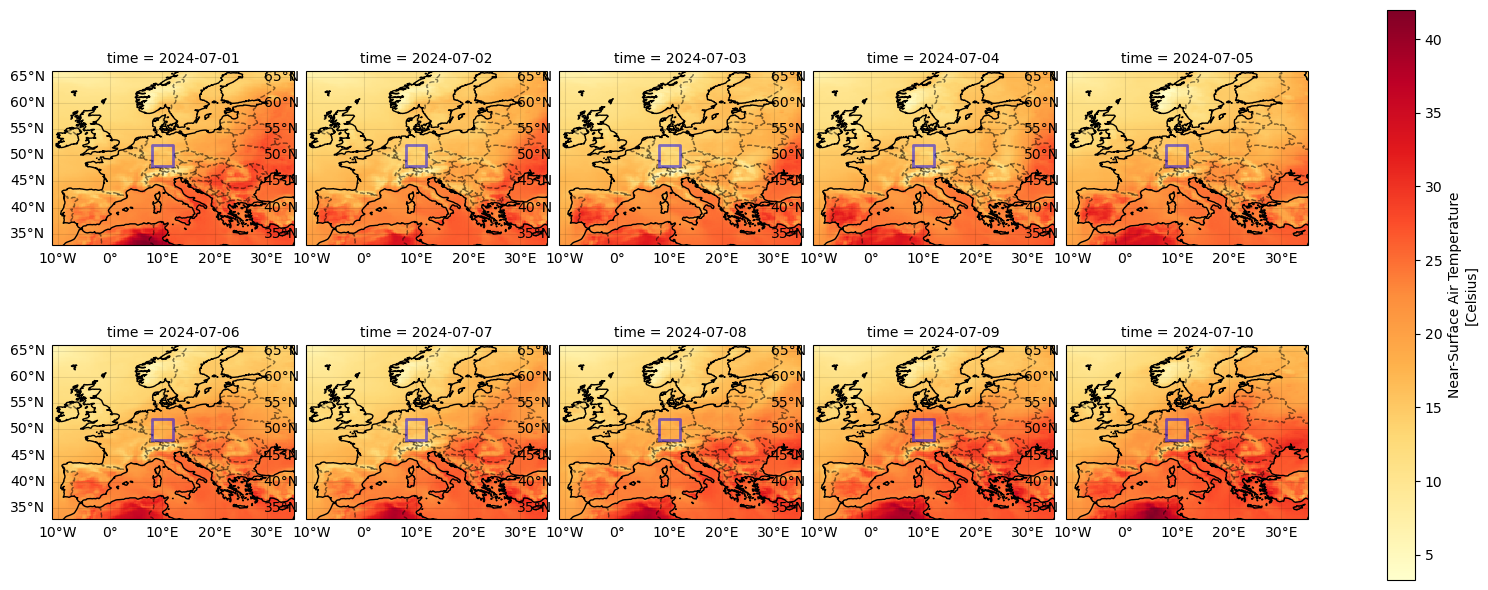

In [41]:
fig = da_event.plot(cmap = "YlOrRd",      # set the colourmap
                    col = "time",         # plot each day in a separate column
                    col_wrap = 5,         # plot 5 panels per row
                    subplot_kws = {"projection" : cartopy.crs.PlateCarree()})    # set geographic projection so we can add geographic features

# add box around area of interest
xn, xx, yn, yx = [8,12,48,52]

# add coastlines and borders
for ax in fig.axs.flat:
    ax.coastlines()
    ax.add_feature(cartopy.feature.BORDERS, alpha = 0.5, ls = "--")
    ax.gridlines(color = "k", alpha = 0.1, draw_labels = ["bottom", "left"])

    ax.plot([xn,xn,xx,xx,xn], [yn,yx,yx,yn,yn], color = "blue", lw = 2, alpha = 0.5)

In [40]:
https://climexp.knmi.nl/data/lsmask_era5_t2m_daily_af_34-42E_-5-5N_-999-lastyear_su.nc